# 作业2 分类方法

SA21229033 徐宽 数据科学

## 1. 决策树（是否出去玩）
如下表数据，前四列是天气情况（阴晴 outlook，气温 temperature，湿度 humidity，风windy）；最后一列是类标签，表示根据天气情况是否出去玩。

(1)  “信息熵”是度量样本集合纯度最常用的一种指标，假定当前样本集合 D 中第 k 类样本所占的比例为 $𝑝_𝑘（k=1, 2, …, K）$ ,请问当什么条件下， D 的信息熵 $Ent(D)$取得最大，最大值为多少？  
(2) 根据表中训练数据，基于信息增益决策树应该选哪个属性作为第一个分类属性？  
(3) 对于含有连续型属性的样本数据，决策树和朴素贝叶斯分类能有哪些处理方法？  
(4) 在分类算法的评价指标中， recall 和 precision 分别是什么含义？  
(5) 若一批数据中有 3 个属性特征， 2 个类标记，则最多可能有多少种不同的决策树？  
（不同决策树指同一个样本在两个两个决策下可能得到不同的类标记）  

| outlook  | temperature | humidity | windy | play |
| -------- | ----------- | -------- | ----- | ---- |
| sunny    | hot         | high     | FALSE | no   |
| sunny    | hot         | high     | TRUE  | no   |
| rainy    | cool        | normal   | TRUE  | no   |
| sunny    | mild        | high     | FALSE | no   |
| sunny    | cool        | normal   | FALSE | yes  |
| rainy    | mild        | normal   | FALSE | yes  |
| overcast | cool        | normal   | TRUE  | yes  |
| rainy    | cool        | normal   | FALSE | yes  |
| rainy    | mild        | high     | FALSE | yes  |
| overcast | hot         | high     | FALSE | yes  |

**答案**  
(1) ${\rm Ent}(D) = -\sum_{k=1}^K p_k\log_2p_k$, 其中 $0<p_k<1,\ \sum_{k=1}^K p_k=1;$  
构造拉格朗日函数:  
$$L(D,\lambda) = -\sum_{k=1}^K p_k\log_2p_k + \lambda(\sum_{k=1}^K p_k-1);$$  
分别对 $p_k$ 求偏导，令 
$$\frac{\partial L}{\partial p_k} = \frac{-1-\log p_k}{\log2}+\lambda = 0,$$ 得：  
$$\log p_k = \lambda\log2-1 (k=1,2,\ldots,K)$$
于是求得稳定点 $(\frac 1K,\frac 1K,\ldots,\frac 1K)^T;$  
容易求得函数在该点的Hessian矩阵为 $-\frac K{\log2}I_K,$ 显然是负定的，所以上述稳定点即为最大值点（凸性显然）。最大值为 $\log_2K$

(2) 这道题手算的话估计要手酸了，还是编程计算吧！代码如下：

In [1]:
import numpy as np
import pandas as pd

# 计算信息熵
def ent(data):
    prob = pd.value_counts(data)/len(data)
    entropy = sum(np.log2(prob)*prob*(-1))
    return entropy

# 计算信息增益
def get_info_gain(data, feat, label):
    e1 = data.groupby(feat).apply(lambda x:ent(x[label]))
    p1 = pd.value_counts(data[feat])/len(data[feat])
    e2 = sum(e1*p1)
    return ent(data[label]) - e2

data = pd.DataFrame({'outlook':['sunny','sunny','rainy','sunny','sunny','rainy','overcast','rainy','rainy','overcast'],
                     'temperature':['hot','hot','cool','mild','cool','mild','cool','cool','mild','hot'],
                     'humidity':['high','high','normal','high','normal','normal','normal','normal','high','high'],
                     'windy':['FALSE','TRUE','TRUE','FALSE','FALSE','FALSE','TRUE','FALSE','FALSE','FALSE'],
                     'play':['no','no','no','no','yes','yes','yes','yes','yes','yes']})
print(ent(data['play']))
label = 'play'
for feat in ['outlook','temperature','humidity','windy']:
    print(get_info_gain(data, feat, label))


0.9709505944546686
0.3219280948873623
0.09546184423832171
0.12451124978365313
0.0912774462416801


由上面程序返回的每个特征的信息增益值，可以看到最大的是第一个特征"outlook"，所以应该选择它作为第一个分类属性。

(3) 对于含有连续型属性的样本数据，决策树和朴素贝叶斯分类能有哪些处理方法？  
可以将连续数据离散化。具体有如下两类：  
* 无监督离散化：等距离散化，等频离散化，聚类离散化
* 有监督离散化：信息增益离散化，ChiMerge离散化等  

(4) 在分类算法的评价指标中， recall 和 precision 分别是什么含义？  
* recall 表示召回率，也叫查全率，体现“有多少真正的正例被查出来”。比如在流失用户预测问题中，如果我们希望算法尽量多地把流失用户找出来，就要保证较高的召回率；  
* precision 表示准确率，也叫查准率，体现“查出来的正例有多少是真正的正例”。同样考虑流失用户预测问题，如果我们要对预测出来的流失用户进行拉活，为了控制成本，把“好钢用在刀刃上”，就要保证较高的准确率。  

(5) 若一批数据中有 3 个属性特征， 2 个类标记，则最多可能有多少种不同的决策树？  
（不同决策树指同一个样本在两个决策下可能得到不同的类标记）  
* 属性1对应3个分支：类0，类1，属性2；
* 属性2对应3个分支：类0，类1，属性3；
* 属性3对应2个分支：类0，类1.  
所以最多有 $(3!)\times (3!)\times (2!) = 72$种不同的决策树。

## 2. 支持向量机
已知正例点$x_1=(2,3)^T, x_2=(3,2)^T$，负例点$x_3=(1,1)^T$  
(1) 使用SVM对其进行分类，求最大间隔分离超平面，并指出所有的支持向量。  
(2) 现额外有一个点能被SVM正确分类且远离决策边界，如果将该点加入到训练集，SVM的决策边界会受影响吗？为什么？

predict_result:
 [1 1 0]


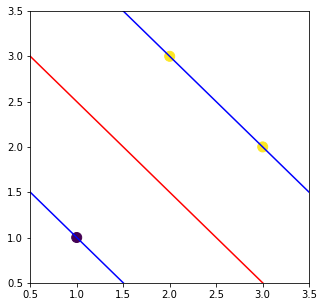

In [2]:
from sklearn import svm
import matplotlib.pyplot as plt

data = np.array([[2,3], [3,2], [1,1] ])
label = [1, 1, 0]
plt.figure(figsize=(5,5))
plt.scatter(data[:,0], data[:,1], c=label, s=100)

classifier = svm.SVC(kernel='linear') 
classifier.fit(data, label)
print('predict_result:\n',classifier.predict(data))
w, b = classifier.coef_, classifier.intercept_
x = np.linspace(0.5, 3.5)
y = -b/w[0,1] - w[0,0]*x/w[0,1]
plt.plot(x, y, 'r-')
plt.plot(x, y+1.5, 'b-')
plt.plot(x, y-1.5, 'b-')

plt.xlim(0.5,3.5)
plt.ylim(0.5,3.5)
plt.show()

(1) 上图中的红线即为分类超平面，很显然这3个点全都是支持向量。  
(2) 如果额外加的点能够被分类正确，且远离决策边界，即其定然不是支持向量，所以不会对决策边界产生任何影响，因为决策边界只由支持向量所决定。

## 3. 决策树（是否进行放贷）
下表是一个由 15 个贷款申请训练数据，数据包括贷款申请人的四个特征属性：分别是年龄，是否有工作，是否有自己的房子以及信贷情况，表的最后一列为类别，是否同意贷款。  

| ID   | 年龄 | 有工作 | 有自己的房子 | 信贷情况 | 类别 |
| ---- | ---- | ------ | ------------ | -------- | ---- |
| 1    | 青年 | 否     | 否           | 一般     | 否   |
| 2    | 青年 | 否     | 否           | 好       | 否   |
| 3    | 青年 | 是     | 否           | 好       | 是   |
| 4    | 青年 | 是     | 是           | 一般     | 是   |
| 5    | 青年 | 否     | 否           | 一般     | 否   |
| 6    | 中年 | 否     | 否           | 一般     | 否   |
| 7    | 中年 | 否     | 否           | 好       | 否   |
| 8    | 中年 | 是     | 是           | 好       | 是   |
| 9    | 中年 | 否     | 是           | 非常好   | 是   |
| 10   | 中年 | 否     | 是           | 非常好   | 是   |
| 11   | 老年 | 否     | 是           | 非常好   | 是   |
| 12   | 老年 | 否     | 是           | 好       | 是   |
| 13   | 老年 | 是     | 否           | 好       | 是   |
| 14   | 老年 | 是     | 否           | 非常好   | 是   |
| 15   | 老年 | 否     | 否           | 一般     | 否   |

(1) 请根据上表的训练数据，以错误率作为划分标准来构建预测是否进行放贷的决策树。  
(2) 按照所构建的决策树，对属性值为（中年，无工作，无自己的房子，信贷情况好）的申请者是否进行放贷?   
(3) 在构建决策树的时候，可能会出现过拟合的问题，有哪些方法可以避免或者解决？  
(4) 对于含有连续型属性的样本数据，决策树有哪些处理方法？

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

data = pd.DataFrame({'年龄':['青年','青年','青年','青年','青年','中年','中年','中年','中年','中年','老年','老年','老年','老年','老年'],
                     '有工作':['否','否','是','是','否','否','否','是','否','否','否','否','是','是','否'],
                     '有自己的房子':['否','否','否','是','否','否','否','是','是','是','是','是','否','否','否'],
                     '贷款情况':['一般','好','好','一般','一般','一般','好','好','非常好','非常好','非常好','好','好','非常好','一般'],
                     '类别':['否','否','是','是','否','否','否','是','是','是','是','是','是','是','否']})
X = data[['年龄', '有工作', '有自己的房子', '贷款情况']]  # 取出特征值
Y = data['类别']  # 取Y值

发现 DecisionTreeClassifier 的 fit 函数需要输入 array的数据，所以我们先将上述文字信息进行编码再调包：

In [4]:
def mapping(s):
    mapping = {'青年':0, '中年':1, '老年':2,
           '一般':0, '好':1, '非常好':2,
           '否':0, '是':1}
    return mapping[s]

data_new = []
for line in data.values:
    for string in line:
        data_new.append(mapping(string))

data_new = np.array(data_new).reshape(15,5)
X, Y = data_new[:,0:4], data_new[:,-1]
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X, Y)

DecisionTreeClassifier(max_depth=4)

(2) 按照所构建的决策树，对属性值为（中年，无工作，无自己的房子，信贷情况好）的申请者是否进行放贷?

In [5]:
x = np.array([mapping(string) for string in ['中年', '否', '否', '好']])
tree_clf.predict(x.reshape(-1,4))

array([0])

返回结果为“0”，即“否”，不应进行放贷  
  
(3) 在构建决策树的时候，可能会出现过拟合的问题，有哪些方法可以避免或者解决？  
当决策树模型出现过拟合问题时，我们一般用剪枝的方法来解决。剪枝又分为预剪枝和后剪枝：  
* 预剪枝：在生成决策树的过程中即进行剪枝，每个节点划分前，衡量当前节点的划分能否提高决策树的泛化能力；  
* 后剪枝：在生成决策树之后再进行剪枝，自底向上考察每个非叶子节点，考虑将该节点替换成叶子节点后能否提高泛化性能；  
  
(4) 对于含有连续型属性的样本数据，决策树有哪些处理方法？  
可以将连续数据离散化。具体有如下两类：  
* 无监督离散化：等距离散化，等频离散化，聚类离散化
* 有监督离散化：信息增益离散化，ChiMerge离散化等    

## 4. 分类器性能评价
请评价两个分类器 M1 和 M2 的性能。所选择的测试集包含 26 个二值属性，记作 A 到 Z。 表中是模型应用到测试集时得到的后验概率（图中只显示正类的后验概率）。因为这是二类问题，所以 $P(-)=1-P(+),P(-|A,…,Z)=1-P(+|A,…,Z)$。假设需要从正类中检测实例。  
(1) 画出 M1 和 M2 的 ROC 曲线（画在一幅图中）。哪个模型更好？给出理由。  
(2) 对模型 M1，假设截止阈值 $t=0.5$。换句话说，任何后验概率大于 t 的测试实例都被看作正例。计算模型在此阈值下的 precision， recall 和 F-score。  
(3) 对模型 M2 使用相同的截止阈值重复（2）的分析。比较两个模型的 F-score，哪个模型更好？所得结果与从 ROC 曲线中得到的结论一致吗？  
(4) 使用阈值 t=0.1 对模型 M2 重复（2）的分析。 t=0.5 和 t=0.1 哪一个阈值更好？该结果和你从 ROC 曲线中得到的一致吗？  

| 实例 | 真实类 | P(+\|A,…,Z,M1) | P(-\|A,…,Z,M2) |
| ---- | ------ | -------------- | -------------- |
| 1    | +      | 0.73           | 0.61           |
| 2    | +      | 0.69           | 0.03           |
| 3    | -      | 0.44           | 0.68           |
| 4    | -      | 0.55           | 0.31           |
| 5    | +      | 0.67           | 0.45           |
| 6    | +      | 0.47           | 0.09           |
| 7    | -      | 0.08           | 0.38           |
| 8    | -      | 0.15           | 0.05           |
| 9    | +      | 0.45           | 0.01           |
| 10   | -      | 0.35           | 0.04           |


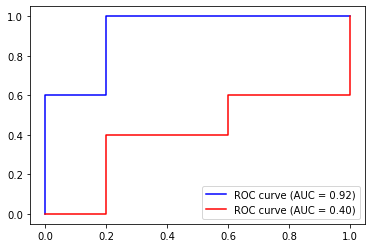

In [6]:
from sklearn.metrics import roc_curve, auc

y = [1, 1, 0, 0, 1, 1, 0, 0, 1, 0]
score1 = [0.73, 0.69, 0.44, 0.55, 0.67, 0.47, 0.08, 0.15, 0.45, 0.35]
score2 = [0.61, 0.03, 0.68, 0.31, 0.45, 0.09, 0.38, 0.05, 0.01, 0.04]

fpr1, tpr1, threshold1 = roc_curve(y, score1)
fpr2, tpr2, threshold2 = roc_curve(y, score2)
roc_auc1 = auc(fpr1,tpr1)  # 计算auc的值
roc_auc2 = auc(fpr2,tpr2)  # 计算auc的值

plt.plot(fpr1, tpr1, 'b-', label='ROC curve (AUC = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, 'r-', label='ROC curve (AUC = %0.2f)' % roc_auc2)
plt.legend(loc="lower right")
plt.show()

(1) 从图上来看，显然是模型 M1 更好，因为它的 ROC 曲线将 M1 的 ROC 曲线完全包住了。  
  
(2) 如果将截止阈值定为 $t=0.5$，则预测结果为 $[1, 1, 0, 1, 1, 0, 0, 0, 0, 0]$  
容易计算出 $$precision = \frac34 = 0.75,\  recall = \frac35 = 0.6, \ F1score = \frac{2\times0.75\times0.6}{0.75+0.6}=0.6667$$  
  
(3) 用同样的截止阈值计算出模型 M2 的预测结果为 $[1, 0, 1, 0, 0, 0, 0, 0, 0, 0]$  
容易计算出 $$precision = \frac12 = 0.5,\  recall = \frac15 = 0.2, \ F1score = \frac{2\times0.5\times0.2}{0.5+0.2}=0.2857$$  
明显是模型 M1 更好，与第一问得出的结论一致。  
  
(4) 令截止阈值定为 $t=0.1$，则模型 M2 的预测结果为 $[1, 0, 1, 1, 1, 0, 1, 0, 0, 0]$  
容易计算出 $$precision = \frac25 = 0.4,\  recall = \frac25 = 0.4, \ F1score = \frac{2\times0.4\times0.4}{0.4+0.4}=0.4$$  
所以 $t=0.1$ 这个阈值更好

## 5. 绘制ROC曲线
下图中数据元组已经按分类器返回概率值的递减顺序排序。对于每个元组，计算真正例（TP）、假正例（FP）、真负例（TN）和假负例（FN）的个数。计算真正例率（TPR）和假正例率（FPR）。为该数据绘制 ROC 曲线。

| 元组号 | 类   | 概率 |
| ------ | ---- | ---- |
| 1      | P    | 0.95 |
| 2      | N    | 0.85 |
| 3      | P    | 0.78 |
| 4      | P    | 0.66 |
| 5      | N    | 0.60 |
| 6      | P    | 0.55 |
| 7      | N    | 0.53 |
| 8      | N    | 0.52 |
| 9      | N    | 0.51 |
| 10     | P    | 0.40 |


如果以0.5为分类阈值的话，那么得到混淆矩阵如下：

|                | 分类为正例 | 分类为负例 |
| :------------: | :--------: | :--------: |
| **实际为正例** |     4(TP)      |     1(FN)      |
| **实际为负例** |     5(FP)      |     0(TN)      |

$TPR = TP/(TP+FN) = 0.8,\ \ FPR = FP/(FP+TN) = 1$

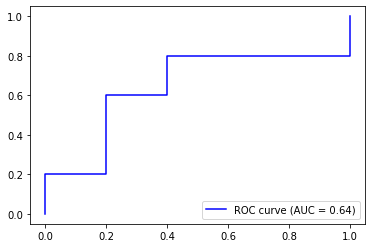

In [7]:
from sklearn.metrics import roc_curve, auc

y = [1, 0, 1, 1, 0, 1, 0, 0, 0, 1]
score = [0.95, 0.85, 0.78, 0.66, 0.60, 0.55, 0.53, 0.52, 0.51, 0.40]

fpr, tpr, threshold = roc_curve(y, score)
roc_auc = auc(fpr,tpr)  # 计算auc的值

plt.plot(fpr, tpr, 'b-', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

##  6. 模型差异显著性检验
假设两个预测模型 M 和 N 之间进行选择。已经在每个模型上做了 10 轮 10-折交叉验证，其中在第 i 轮， M 和 N 都是用相同的数据划分。 M 得到的错误率为 30.5, 32.2,20.7, 20.6, 31.0, 41.0, 27.7, 28.0, 21.5, 28.0。 N 得到的错误率为 22.4, 14.5, 22.4,19.6, 20.7, 20.4, 22.1, 19.4, 18.2, 35.0。评述在 1%的显著水平上，一个模型是否显著地比另一个好。

In [8]:
import numpy as np
from scipy.stats import ttest_ind

err_m = [30.5, 32.2,20.7, 20.6, 31.0, 41.0, 27.7, 28.0, 21.5, 28.0]
err_n = [22.4, 14.5, 22.4,19.6, 20.7, 20.4, 22.1, 19.4, 18.2, 35.0]
print(np.mean(err_m)-np.mean(err_n))

p = ttest_ind(err_m, err_n).pvalue
print(p)

6.649999999999999
0.019580714527429998


可以看到上述显著性检验中，$p=0.0196>0.01$，所以在 1% 的显著水平上，不能认为 M 模型显著地比 N 好。